# Medical Cost Personal

The informartion about the dataset can be found here: https://www.kaggle.com/datasets/mirichoi0218/insurance here our goal is to do a full analysis in the dataset trying to understand what impacts the costs at the most instead of trying to predict the value, let do it!

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [31]:
df = pd.read_csv("insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Any null data, means that the dataset is well treated

In [33]:
print(df.nunique())
df.dtypes

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

this data can have better types that impacts less the memory, so lets apply them

In [34]:
def fix_dtypes_from_df(df:pd.DataFrame) -> pd.DataFrame:
    df['is_male'] = df['sex'] == 'male'
    df = df.drop('sex',axis=1)
    df['region'] = df['region'].astype('category')
    df['smoker'] = df['smoker'].map({'yes':True,'no':False})
    df['age'] = df['age'].astype('int')
    return df

In [35]:
df = fix_dtypes_from_df(df)

# Regression

In [39]:
y_var = 'charges'

## Apply Dummies

In [36]:
df = pd.get_dummies(df, drop_first=True)

## Interactions

In [37]:
import itertools
for x in itertools.combinations(df.columns.drop(y_var), 2):
    df[f'{x[0]}_{x[1]}'] = df[x[0]]*df[x[1]]

## Clean useless interactions

In [55]:
df = df.drop(df.columns[df.nunique() == 1].tolist(),axis=1)

## Apply Regression

In [1]:
import statsmodels.api as sm
Xtrain = df.drop(y_var,axis=1).astype(float)
Xtrain['const'] = 1
ytrain = df[[y_var]]
   
model = sm.OLS(ytrain, Xtrain).fit(max_iter=1000)
model.summary()

NameError: name 'df' is not defined

In [86]:
top_features = Xtrain.columns[model.pvalues < 0.06].drop('const',errors='ignore').to_list()
top_features

['age', 'smoker', 'bmi_smoker', 'bmi_region_southeast']

In [89]:
Xtrain = df[top_features].astype(float)
Xtrain['const'] = 1
ytrain = df[[y_var]]
   
model = sm.OLS(ytrain, Xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1710.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:03:40   Log-Likelihood:                -13264.
No. Observations:                1338   AIC:                         2.654e+04
Df Residuals:                    1333   BIC:                         2.656e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                    266.7729      9.541     27.960      0.000     248.055     285.491
smoker               -2.093e+04   1504.254    -13.916      0.000   -2.39e+04    -1.8e+04
bmi_smoker            1459.8788     47.907     30.473      0.000    1365.898    1553.859
bmi_region_southeast   -20.4867      8.998     -2.277      0.023     -38.138      -2.835
const                -1896.8843    412.898     -4.594      0.000   -2706.886   -1086.883
==============================================================================
Omnibus:                      710.347   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4277.827
Skew:                           2.491   Prob(JB):                         0.00
Kurtosis:                      10.205   Cond. No.                         485.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Analytics 

now that we saw the most important features with a linear regression lets see more about them!

In [91]:
df = pd.read_csv("insurance.csv")
df = fix_dtypes_from_df(df)

<AxesSubplot: >

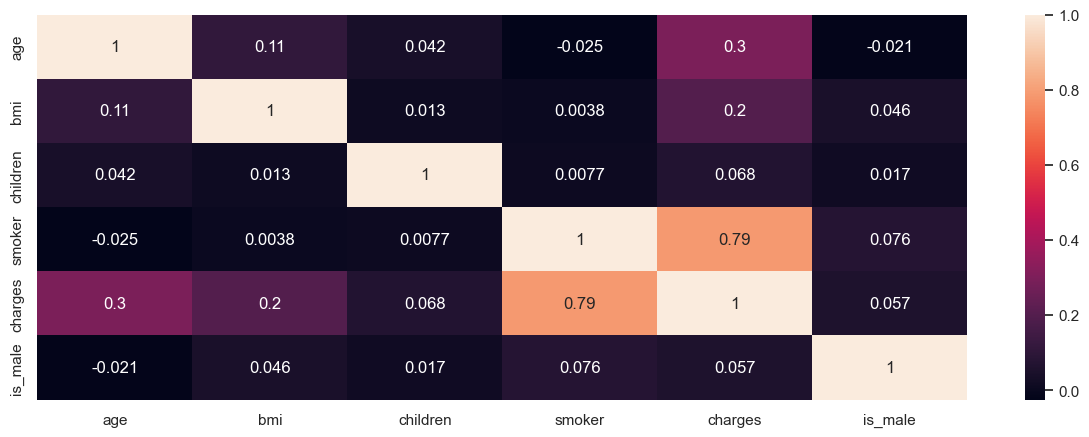

In [92]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)

Se Charges and smoker has a big linear relationship, bmi and age seems to impact directly too, lets see the distributions

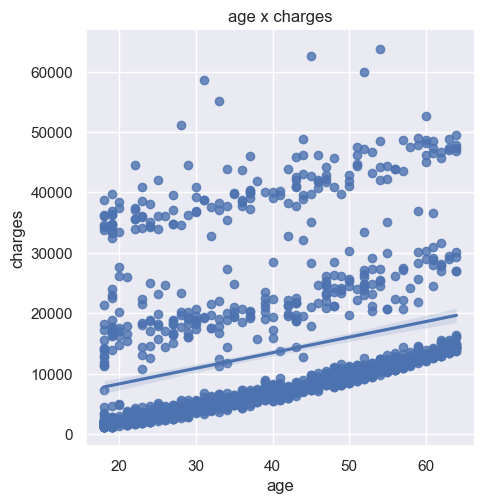

In [137]:
sns.lmplot(df,x='age',y='charges')
plt.title('age x charges')
plt.show()

we clearly see a little linear increase

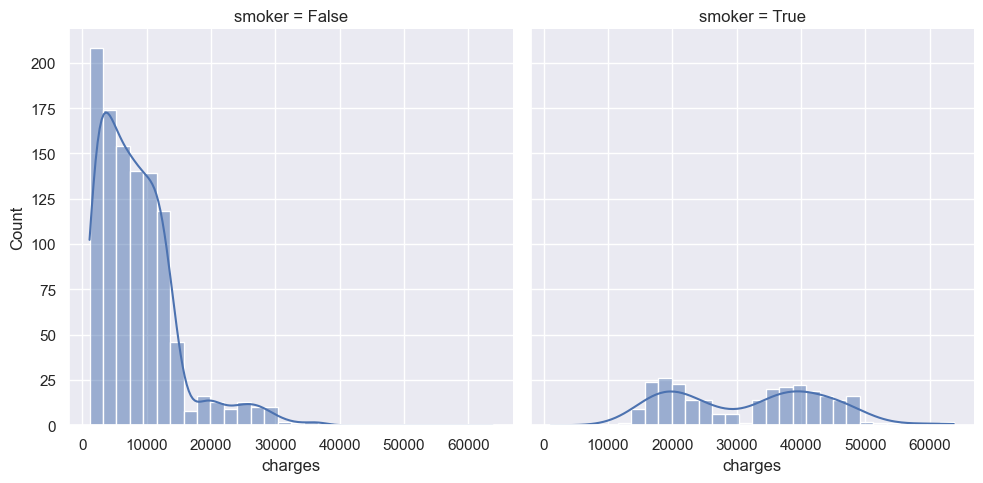

In [138]:
sns.displot(df,x='charges',col='smoker',kde=True)
plt.show()

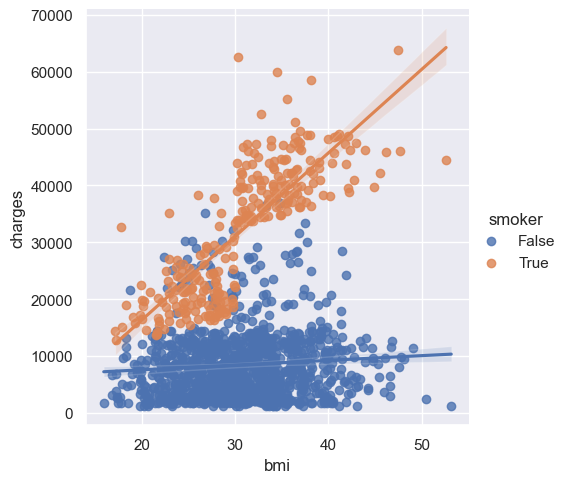

In [139]:
sns.lmplot(df,x='bmi',y='charges',hue='smoker')
plt.show()

here is really interesting, if you are a smoker the bmi really impacts in your costs, but if don't smoke it doesn't impact so much

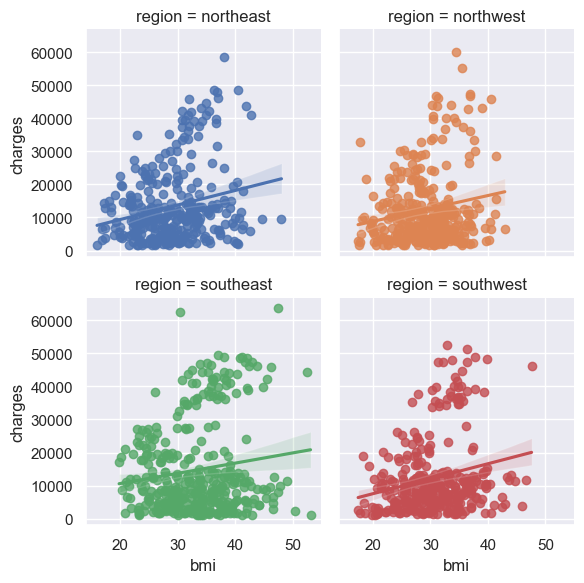

In [141]:
sns.lmplot(data=df,x='bmi',y='charges',col='region',col_wrap=2,hue='region',ci=95,scatter=True, height=3)
plt.show()

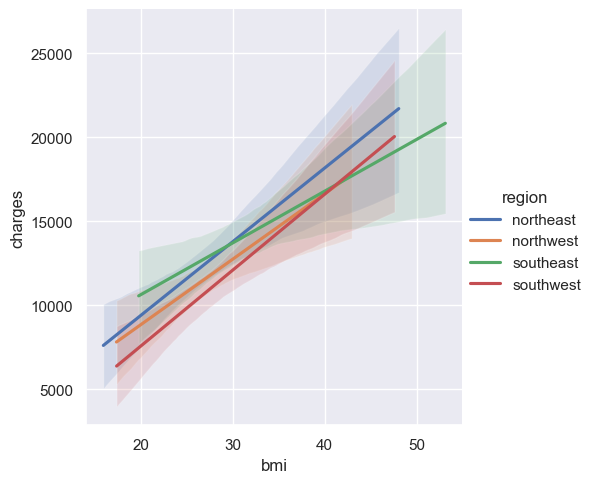

In [130]:
sns.lmplot(data=df,x='bmi',y='charges',hue='region',ci=95,scatter=False)
plt.show()

Southeast seems to have a different interaction than the others

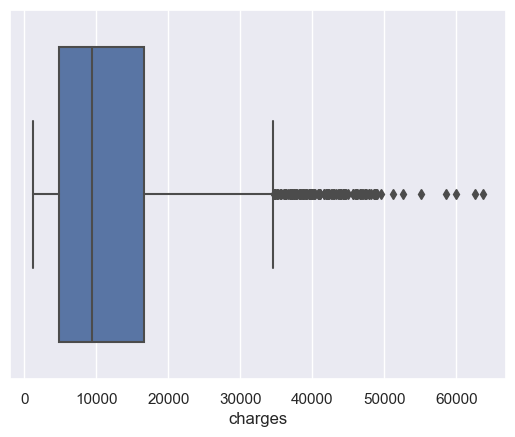

In [136]:
sns.boxplot(x=df['charges'])
plt.show()

# Conclusion

We tried to figure out what we the features that impacts most the insurance costs and give you some tips to help you pay less!

- There is a minimum value of the insurance (of course would be) so anyway you will need to pay (**const is required**)
- As older you get more you will pay, but there are ways to help you pay less (**age increases the price**)
- Holy shit if you smoke will pay a lot higher (3.8x more) so please don't smoke! (**smoke is a factor by itseft**)
- Well you can't wait to use some cigarretes right? but at least be fit, do some exercises and let your bmi low, it will help to decrease the prices (**smoke and bmi interactons is really huge**)
- if your bmi is high at least run away of southeast, there they ask for more money to take care of you, but we don't have the data to discover why of it :/ (**interaction between bmi and region**)